In [1]:
from __future__ import print_function
%matplotlib inline
import argparse
import time
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.animation as animation
from IPython.display import HTML
from torchvision.utils import save_image
from torch.autograd import Variable
from pathlib import Path
from numpy import asarray
from PIL import Image

In [22]:
fakefolder = "HyperparameterData/LSGANadam0.0002l16b/testout"
filename = "testoutput16.png"
imgfake = Image.open(fakefolder+"/"+filename)

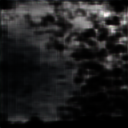

In [23]:
imgfake

In [24]:
imgfake1c = imgfake.convert('L')  #convert a gray scale
#imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
data = asarray(imgfake1c)

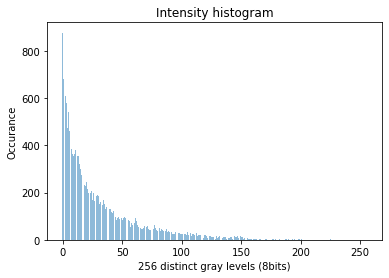

In [27]:
heightDistributionfake = [0]*256
for pix_val in (data.flatten()).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.xlabel('256 distinct gray levels (8bits)')
plt.title('Intensity histogram')
plt.show() 

In [2]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam0.0002l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

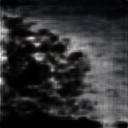

In [4]:
imgfake

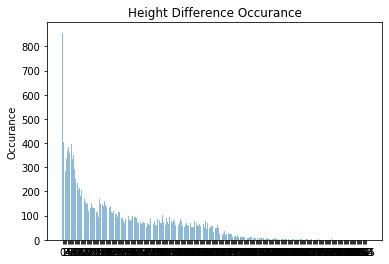

In [3]:
heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


In [5]:
performance.index(max(performance))

35